# Catalog dataframe

The first things we need to know about the data are
 1. which simulations are available, and
 2. what physical systems those simulations represent.

We provide a pre-built interface to all of the data at
https://data.black-holes.org/.  That page actually runs Python
directly in the browser, and calls a subset of the code described in
this tutorial — though with nice interactive tables and plots.

Here, we explain some of the fundamentals, and give examples of how to
use the data directly.

To begin, we load the dataframe object with the `sxs.load` function:

In [ ]:
import sxs

df = sxs.load("dataframe", tag="3.0.0")

Note the argument `tag`, which specifies the version of the data that you want to load.  If you do not specify this argument, `sxs` will search for the most recent tag on github, and use that.  However, to ensure that you can reproduce your own results, it is always a good idea to specify the tag explicitly.  More importantly, when you publish results using data from the SXS catalog, you should cite the tag you used so that others can also reproduce your work.

The first time you call this function, or the first time you ask for a new `tag`, it will attempt to download [the latest data from github](https://github.com/sxs-collaboration/sxs/tree/simulations) and cache it locally, as described in [the previous notebook](../00-Introduction#configuration-and-caching-preliminaries).

The returned object is a `pandas.DataFrame`, which is the standard way to represent tabular data in Python.  The index of the dataframe is the SXS ID, which is a unique identifier for each simulation.  The SXS ID is a string of the form `SXS:BBH:1234`, where `BBH` indicates that this is a binary black hole simulation, and `1234` is a unique number assigned to this simulation.  The SXS ID can be used to look up the simulation in the SXS catalog.  The dataframe also has a number of columns that describe the simulation, including the physical parameters of the system, as well as other important metadata:

In [2]:
df

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0001,True,1.000000,1.215639e-07,9.733309e-10,1.429939e-09,0.000257,0.000257,320.000000,7.097521e-10,-6.660518e-10,...,"[-8.999999874197535, -2.86646421e-08, 0.0]",28.119083,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v1.6, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr...",2012-07-31 17:17:11,2012-08-01 01:46:59,2012-08-17 20:48:06,2019-03-30 13:41:50
SXS:BBH:0002,True,1.000000,9.399402e-08,7.181763e-10,1.473155e-09,0.000175,0.000175,310.000000,6.507563e-10,-3.037983e-10,...,"[-9.49999971865619, 2.0830027e-07, 0.0]",32.421068,NaN,NaN,"[, v1.1, v1.2, v1.4, v1.5, v1.6, v1.7, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr...",2012-07-31 17:17:11,2012-08-01 02:24:21,2012-08-26 06:41:57,2019-03-30 13:41:50
SXS:BBH:0003,True,1.000440,2.707179e-04,4.993912e-01,7.428880e-08,0.000287,0.000287,210.000000,4.965977e-01,5.274908e-02,...,"[-9.507365032939443, -0.0023408782825215, 0.0]",32.337574,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Precessing-Spins, ManyMergers-QuasiCircular, ...",2012-08-07 19:02:51,2012-08-18 20:24:58,2012-08-22 10:48:06,2019-03-30 13:41:50
SXS:BBH:0004,True,1.000459,-2.498083e-01,5.018106e-11,1.402755e-09,0.000380,0.000380,640.000000,-2.424428e-12,-1.449169e-11,...,"[-9.50286409695725, 0.0031879777731917, 0.0]",30.188749,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep...",2012-08-07 19:02:51,2012-08-18 20:24:58,2012-08-25 10:38:13,2019-03-30 13:41:50
SXS:BBH:0005,True,1.000460,2.498115e-01,6.905084e-11,2.745050e-09,0.000236,0.000236,390.000000,-3.646774e-12,1.616084e-11,...,"[-9.01162380399282, -0.0070599738280454, 0.0]",30.190238,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep...",2012-08-07 19:02:51,2012-08-17 05:20:02,2012-08-28 09:11:15,2019-03-30 13:41:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:NSNS:0006,False,1.199984,0.000000e+00,0.000000e+00,0.000000e+00,0.000160,0.000160,363.175161,0.000000e+00,0.000000e+00,...,"[20.1881, 0.000300831, 0.0]",NaN,NaN,NaN,NaN,[],2022-06-09 20:57:46,2022-06-22 14:35:12,2022-06-22 14:42:52,2023-09-26 23:00:19
SXS:NSNS:0007,False,0.831025,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,363.158338,0.000000e+00,0.000000e+00,...,"[16.3414, -0.000239926, 0.0]",NaN,NaN,NaN,NaN,[],2020-04-13 20:55:51,2020-11-30 13:36:56,2020-11-30 14:14:49,2023-10-04 21:50:19
SXS:NSNS:0008,False,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.001317,0.001317,359.961309,0.000000e+00,0.000000e+00,...,"[18.5, -0.000297416, 0.0]",NaN,NaN,NaN,NaN,[],2022-06-09 19:14:59,2022-06-17 13:10:13,2022-06-17 13:17:17,2023-09-26 23:00:19
SXS:NSNS:0009,False,1.099992,0.000000e+00,0.000000e+00,0.000000e+00,0.000920,0.000920,360.634903,0.000000e+00,0.000000e+00,...,"[19.3833, -0.000276636, 0.0]",NaN,NaN,NaN,NaN,[],2022-06-09 19:14:59,2022-06-17 13:05:03,2022-06-17 13:18:31,2023-09-26 23:00:19


Most of these columns are described in more detail in [the most recent SXS catalog paper](https://doi.org/10.26138/sxscatalog3) — although the dataframe also includes some computed columns, such as the magnitude and individual Cartesian components of any vector.

Note that [marimo](https://docs.marimo.io/) is a helpful interface (along the lines of Jupyter) with built-in support for `pandas` objects, including the ability to display *interactive* tables.  Examples are available on the SXS catalog home page at https://data.black-holes.org/.

### Slices

We can slice the dataframe in a dizzying number of ways.  But there are two that are simplest and most reliable.  First, and most easily, we can take standard slices, like the first four elements:

In [3]:
df[:4]

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0001,True,1.000000,1.215639e-07,9.733309e-10,1.429939e-09,0.000257,0.000257,320.0,7.097521e-10,-6.660518e-10,...,"[-8.999999874197535, -2.86646421e-08, 0.0]",28.119083,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v1.6, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr...",2012-07-31 17:17:11,2012-08-01 01:46:59,2012-08-17 20:48:06,2019-03-30 13:41:50
SXS:BBH:0002,True,1.000000,9.399402e-08,7.181763e-10,1.473155e-09,0.000175,0.000175,310.0,6.507563e-10,-3.037983e-10,...,"[-9.49999971865619, 2.0830027e-07, 0.0]",32.421068,NaN,NaN,"[, v1.1, v1.2, v1.4, v1.5, v1.6, v1.7, v2.0]","[Non-Spinning, ManyMergers-QuasiCircular, depr...",2012-07-31 17:17:11,2012-08-01 02:24:21,2012-08-26 06:41:57,2019-03-30 13:41:50
SXS:BBH:0003,True,1.000440,2.707179e-04,4.993912e-01,7.428880e-08,0.000287,0.000287,210.0,4.965977e-01,5.274908e-02,...,"[-9.507365032939443, -0.0023408782825215, 0.0]",32.337574,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Precessing-Spins, ManyMergers-QuasiCircular, ...",2012-08-07 19:02:51,2012-08-18 20:24:58,2012-08-22 10:48:06,2019-03-30 13:41:50
SXS:BBH:0004,True,1.000459,-2.498083e-01,5.018106e-11,1.402755e-09,0.000380,0.000380,640.0,-2.424428e-12,-1.449169e-11,...,"[-9.50286409695725, 0.0031879777731917, 0.0]",30.188749,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[Aligned-Spins, ManyMergers-QuasiCircular, dep...",2012-08-07 19:02:51,2012-08-18 20:24:58,2012-08-25 10:38:13,2019-03-30 13:41:50


Or we can select columns to extract:

In [4]:
df[["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028
SXS:BBH:0005,BHBH,-0.000016
...,...,...
SXS:NSNS:0006,NSNS,-0.000027
SXS:NSNS:0007,NSNS,-0.000030
SXS:NSNS:0008,NSNS,-0.000031
SXS:NSNS:0009,NSNS,-0.000032


To combine them, we just do them in sequence:

In [5]:
df[:4][["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028


### Tests

The concept of tests is fairly simply.  For example, we can test whether or not the `object_types` field is equal to `BHNS`:

In [6]:
df["object_types"] == "BHNS"

SXS:BBH:0001     False
SXS:BBH:0002     False
SXS:BBH:0003     False
SXS:BBH:0004     False
SXS:BBH:0005     False
                 ...  
SXS:NSNS:0006    False
SXS:NSNS:0007    False
SXS:NSNS:0008    False
SXS:NSNS:0009    False
SXS:NSNS:0010    False
Name: object_types, Length: 4170, dtype: bool

We get a pandas Series object, where most of the results say `False`, but the last few say `True` — because they are the ones for which the `object_types` field is `BHNS`.  Now, we can use this Series just like we would in numpy to extract the items where this test gives us `True`:

In [7]:
df[df["object_types"] == "BHNS"]

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BHNS:0001,False,6.000024,0.000007,1.374112e-08,0.0,NaN,0.001300,300.000000,-1.110994e-08,-8.083254e-09,...,"[-8.999999874197535, -2.86646421e-08, 0.0]",12.647523,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]",2013-03-06 21:52:11,2013-03-07 08:12:43,2013-04-29 11:11:15,2019-04-15 02:48:30
SXS:BHNS:0002,False,1.999998,0.000002,1.662024e-09,0.0,NaN,0.000500,400.000000,7.870209e-10,-1.463872e-09,...,"[-37.330292064606674, -0.00015284676006403007,...",13.300000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0003,False,2.999984,NaN,NaN,NaN,NaN,0.000500,700.000000,-6.571999e-08,-1.563577e-08,...,"[-38.4325, 0.0, 0.0]",13.300000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0004,False,1.000031,NaN,NaN,NaN,NaN,0.000060,500.000000,2.852307e-09,9.857248e-10,...,"[-19.6, 0.0, 0.0]",12.300000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0005,False,1.000014,NaN,NaN,NaN,0.000500,0.000500,481.500000,-9.091780e-08,2.217490e-09,...,"[-19.6, 0.0, 0.0]",10.800000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0006,False,1.500007,NaN,NaN,NaN,NaN,0.000270,500.000000,-7.003152e-09,1.067139e-08,...,"[-31.5, 0.0, 0.0]",16.600000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0007,False,2.000000,NaN,NaN,NaN,NaN,0.000470,500.000000,-5.265540e-08,2.372880e-08,...,"[-37.3333, 0.0, 0.0]",12.300000,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0008,False,3.001745,0.674294,1.724298e-07,0.0,0.000501,0.000501,684.569779,-1.265404e-09,-7.913752e-09,...,"[-47.25, 0.0, 0.0]",NaN,NaN,NaN,"[, v2.0]",[],NaT,NaT,NaT,NaT
SXS:BHNS:0009,False,4.002338,0.719236,8.007617e-08,0.0,0.001721,0.001721,852.584912,4.429089e-09,4.136482e-09,...,"[-61.6, 0.0, 0.0]",NaN,NaN,NaN,"[, v2.0]",[],NaT,NaT,NaT,NaT
SXS:BHNS:0010,False,3.000562,0.395555,5.321927e-01,0.0,0.003001,0.003001,684.577207,5.267177e-01,4.443504e-02,...,"[-53.775, 0.0, 0.0]",NaN,NaN,NaN,"[, v2.0]",[],NaT,NaT,NaT,NaT


(Here, we're just looking at the data, so we don't bother with the fancy grid we used above.)

Next, we might want to combine tests.  This is done by putting each test inside parentheses, and combinging results with `&`:

In [8]:
df[(df["object_types"] == "BHNS") & (df["initial_separation"] < 52)]

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BHNS:0003,False,2.999984,NaN,NaN,NaN,NaN,0.00050,700.0,-6.571999e-08,-1.563577e-08,...,"[-38.4325, 0.0, 0.0]",13.3,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v2.0]","[Non-Spinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0004,False,1.000031,NaN,NaN,NaN,NaN,0.00006,500.0,2.852307e-09,9.857248e-10,...,"[-19.6, 0.0, 0.0]",12.3,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[NonSpinning, Polytrope]",NaT,NaT,NaT,NaT
SXS:BHNS:0005,False,1.000014,NaN,NaN,NaN,0.0005,0.00050,481.5,-9.091780e-08,2.217490e-09,...,"[-19.6, 0.0, 0.0]",10.8,NaN,NaN,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0]","[SpinningNS, Polytrope]",NaT,NaT,NaT,NaT


Here, the combined test is only `True` if both tests to return `True` — the `&` operator is the boolean AND.  We also have OR with `|` and XOR with `^`, as well as negation with `~` — though this can usually be achieved by changing the test.

# Built-in filters

The `df` object has various built-in filters that can be used to
extract data.  This is because `df` is actually a
`SimulationsDataFrame`, which is a subclass of `pandas.DataFrame`, so
it has extra attributes.  We can list them all here:

In [9]:
import pandas as pd

set(dir(type(df))) - set(dir(pd.DataFrame))

{'BBH',
 'BHBH',
 'BHNS',
 'BNS',
 'IMR',
 'NSBH',
 'NSNS',
 'deprecated',
 'eccentric',
 'hyperbolic',
 'noneccentric',
 'nonprecessing',
 'precessing',
 'undeprecated'}

These names are all fairly self-explanatory, and are individually
documented with more details.  Each one returns another
`SimulationsDataFrame` with just the selected simulations; as such
they can be combined.  For example, to get only un-deprecated
eccentric BBH systems, we can call
```python
df.undeprecated.BBH.eccentric
```

### Sorting

As with the fancy graphical table above, we can perform a standard sort with respect to any key:

In [10]:
df.BBH.sort_values("initial_separation")

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:1145,False,1.249997,2.144264e-06,3.898542e-10,3.458803e-11,NaN,NaN,13.0,-3.829624e-10,-7.298039e-11,...,"[-4.871504224452922, 0.0126460374892269, 0.0]",3.495635e+00,3.495635e+00,3.433299e+00,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-09-23 15:06:10,2015-09-23 18:38:59,2015-09-26 22:34:35,2025-01-28 01:00:31.247358
SXS:BBH:3722,False,3.817251,3.335513e-01,8.981276e-01,7.176135e-01,0.152158,0.152158,342.5,8.546314e-01,3.483516e-02,...,"[-7.451739902660199, 0.035700869734113, 0.0334...",9.975052e+00,9.975052e+00,8.350220e+00,"[, v2.0, v3.0]",[],2022-01-15 21:49:17,2022-03-04 17:23:06,2022-07-16 03:33:22,2025-01-28 18:15:26.418029
SXS:BBH:3704,False,1.666655,3.074859e-01,9.911856e-03,3.157166e-04,NaN,NaN,240.0,8.447812e-03,4.831329e-03,...,"[-5.8973114013009935, 0.0178116687187507, 0.00...",6.396565e+00,6.396565e+00,5.182133e+00,"[, v2.0, v3.0]",[],2020-06-18 05:27:31,2020-07-19 12:46:31,2020-08-06 17:18:07,2025-01-28 16:40:21.204794
SXS:BBH:3726,False,1.228916,2.937017e-01,8.563209e-01,3.719536e-01,0.270289,0.270289,364.5,-7.421380e-01,-4.340325e-01,...,"[-5.1821982922704874, 0.0101374549239111, -0.0...",8.439590e+00,8.439590e+00,6.888812e+00,"[, v2.0, v3.0]",[],2021-07-21 19:36:21,2022-01-11 18:34:14,2022-02-08 03:23:22,2025-01-28 18:14:53.938003
SXS:BBH:3720,False,1.240874,2.682820e-01,7.159846e-01,7.572758e-01,NaN,NaN,301.5,-5.061743e-01,-4.474765e-01,...,"[-5.252781561663051, 0.0089879732395598, -0.03...",6.843151e+00,6.843151e+00,5.407691e+00,"[, v2.0, v3.0]",[],2022-01-15 21:49:17,2022-02-18 11:30:03,2022-03-04 17:35:56,2025-01-28 18:14:46.492079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BBH:4000,False,1.000000,2.353748e-10,3.186150e-10,3.150481e-10,NaN,NaN,670.0,3.366684e-11,3.168313e-10,...,"[-125.00007703959201, 1.57972238326e-05, 0.000...",3.838468e+00,3.838468e+00,3.828192e+00,"[, v3.0]",[],2024-07-25 08:17:07,2024-07-25 11:13:06,2024-08-04 06:32:14,2025-01-28 16:31:02.163013
SXS:BBH:3990,True,1.000000,-1.349331e-14,2.340154e-10,2.311762e-10,NaN,NaN,310.0,-2.318374e-13,2.340779e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.753268e-09,9.753268e-09,9.723255e-09,"[, v3.0]",[deprecated],2024-09-15 22:58:33,2024-09-20 09:39:59,2024-09-26 09:12:45,2025-04-08 20:13:56.568156
SXS:BBH:3996,False,1.000000,7.517316e-14,2.351166e-10,2.310230e-10,NaN,NaN,310.0,-2.378321e-13,2.351841e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.706578e-09,9.706578e-09,9.676564e-09,"[, v3.0]",[],2024-10-16 15:35:58,2024-10-18 16:13:23,2024-11-13 06:55:19,2025-01-28 18:19:35.519535
SXS:BBH:3987,True,1.000000,4.176085e-14,2.341179e-10,2.308822e-10,NaN,NaN,310.0,-2.209407e-13,2.341826e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.938248e-09,9.938248e-09,9.908231e-09,"[, v3.0]",[deprecated],2024-09-09 16:48:50,2024-09-10 10:46:35,2024-09-21 01:05:14,2025-04-08 20:10:11.081591


But unlike the fancy graphical table above, we can use a function that serves as the sort key.  (This sort of key function is also available in the standard python library's `sorted` function.)  Here, we'll sort by the absolute value of the difference between `initial_separation` and 20.0.

In [11]:
sorting_field = "initial_separation"
desired_value = 20.0

df.BBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0204,False,7.001168,3.498908e-01,6.217940e-08,2.747613e-08,0.000026,0.000026,296.0,2.292678e-08,3.490818e-08,...,"[-17.515569995515307, 0.0093443633956847, 0.0]",8.836930e+01,8.836930e+01,8.787693e+01,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2013-08-23 22:48:09,2013-09-02 15:05:40,2014-04-01 19:53:23,2025-04-16 20:03:07.176331
SXS:BBH:1130,False,1.000004,-5.104350e-04,5.999922e-01,1.560264e-08,0.000252,0.000252,160.0,-3.991107e-02,5.986615e-01,...,"[-9.986900818249802, -0.0079228234220203, 0.0]",3.677521e+01,3.677521e+01,3.650749e+01,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2014-07-16 18:32:05,2014-07-21 08:37:28,2014-09-15 16:10:45,2025-01-28 03:39:39.749483
SXS:BBH:1131,False,1.000017,8.786219e-04,5.999634e-01,1.941851e-08,0.000087,0.000087,470.0,5.841738e-01,1.367446e-01,...,"[-10.101294991597507, -0.010416650565165, 0.0]",3.679601e+01,3.679601e+01,3.600615e+01,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2014-06-30 17:56:22,2014-07-17 16:56:33,2014-10-02 20:35:34,2025-01-28 03:37:18.462033
SXS:BBH:0623,False,1.111081,5.742299e-03,8.917771e-01,8.915548e-01,0.000067,0.000067,230.0,8.864194e-01,1.012121e-01,...,"[-10.537514026848347, -0.0398791824195513, 0.0]",3.747046e+01,3.747046e+01,3.708570e+01,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-01-09 00:07:43,2015-01-09 02:04:36,2016-06-07 08:58:47,2025-01-28 03:44:07.649317
SXS:BBH:3661,True,1.400062,3.288885e-01,2.950220e-08,5.486936e-08,0.000065,0.000065,1494.5,6.919824e-08,-3.278550e-08,...,"[-11.783346845755291, -0.0402772562166922, 0.0]",4.100697e+01,4.100697e+01,3.847501e+01,"[, v2.0, v3.0]",[deprecated],2015-04-06 20:49:13,2015-04-28 15:57:48,2015-07-26 06:28:36,2025-01-28 18:25:21.177337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BBH:4000,False,1.000000,2.353748e-10,3.186150e-10,3.150481e-10,NaN,NaN,670.0,3.366684e-11,3.168313e-10,...,"[-125.00007703959201, 1.57972238326e-05, 0.000...",3.838468e+00,3.838468e+00,3.828192e+00,"[, v3.0]",[],2024-07-25 08:17:07,2024-07-25 11:13:06,2024-08-04 06:32:14,2025-01-28 16:31:02.163013
SXS:BBH:3990,True,1.000000,-1.349331e-14,2.340154e-10,2.311762e-10,NaN,NaN,310.0,-2.318374e-13,2.340779e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.753268e-09,9.753268e-09,9.723255e-09,"[, v3.0]",[deprecated],2024-09-15 22:58:33,2024-09-20 09:39:59,2024-09-26 09:12:45,2025-04-08 20:13:56.568156
SXS:BBH:3996,False,1.000000,7.517316e-14,2.351166e-10,2.310230e-10,NaN,NaN,310.0,-2.378321e-13,2.351841e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.706578e-09,9.706578e-09,9.676564e-09,"[, v3.0]",[],2024-10-16 15:35:58,2024-10-18 16:13:23,2024-11-13 06:55:19,2025-01-28 18:19:35.519535
SXS:BBH:3993,True,1.000000,-4.327871e-14,2.336804e-10,2.313359e-10,NaN,NaN,310.0,-2.206551e-13,2.337447e-10,...,"[-199.999521558393, -0.0001099573632147, -8.63...",9.766881e-09,9.766881e-09,9.736864e-09,"[, v3.0]",[deprecated],2024-09-09 16:48:50,2024-09-10 10:56:00,2024-09-20 02:56:53,2025-04-08 19:57:43.249388


So, if we want the 8 systems with initial separations closest to 20, we can just take them:

In [12]:
sorting_field = "initial_separation"
desired_value = 20.0
N = 8

df.BBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))[:N]

,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0204,False,7.001168,3.498908e-01,6.217940e-08,2.747613e-08,0.000026,0.000026,296.0,2.292678e-08,3.490818e-08,...,"[-17.515569995515307, 0.0093443633956847, 0.0]",88.369299,88.369299,87.876931,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2013-08-23 22:48:09,2013-09-02 15:05:40,2014-04-01 19:53:23,2025-04-16 20:03:07.176331
SXS:BBH:1130,False,1.000004,-5.104350e-04,5.999922e-01,1.560264e-08,0.000252,0.000252,160.0,-3.991107e-02,5.986615e-01,...,"[-9.986900818249802, -0.0079228234220203, 0.0]",36.775214,36.775214,36.507493,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2014-07-16 18:32:05,2014-07-21 08:37:28,2014-09-15 16:10:45,2025-01-28 03:39:39.749483
SXS:BBH:1131,False,1.000017,8.786219e-04,5.999634e-01,1.941851e-08,0.000087,0.000087,470.0,5.841738e-01,1.367446e-01,...,"[-10.101294991597507, -0.010416650565165, 0.0]",36.796011,36.796011,36.006148,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2014-06-30 17:56:22,2014-07-17 16:56:33,2014-10-02 20:35:34,2025-01-28 03:37:18.462033
SXS:BBH:0623,False,1.111081,5.742299e-03,8.917771e-01,8.915548e-01,0.000067,0.000067,230.0,8.864194e-01,1.012121e-01,...,"[-10.537514026848347, -0.0398791824195513, 0.0]",37.470458,37.470458,37.085702,"[, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2015-01-09 00:07:43,2015-01-09 02:04:36,2016-06-07 08:58:47,2025-01-28 03:44:07.649317
SXS:BBH:3661,True,1.400062,3.288885e-01,2.950220e-08,5.486936e-08,0.000065,0.000065,1494.5,6.919824e-08,-3.278550e-08,...,"[-11.783346845755291, -0.0402772562166922, 0.0]",41.006968,41.006968,38.475014,"[, v2.0, v3.0]",[deprecated],2015-04-06 20:49:13,2015-04-28 15:57:48,2015-07-26 06:28:36,2025-01-28 18:25:21.177337
SXS:BBH:2299,True,1.000000,-2.063040e-06,1.002663e-09,9.446935e-10,0.280834,0.280834,160.0,2.961036e-10,-9.579443e-10,...,"[-9.998901474327717, 1.198447144e-07, 3.879346...",28.242072,NaN,NaN,"[, v2.0]",deprecated,2019-07-23 23:57:41,2019-08-16 02:51:53,2019-08-22 10:37:56,2019-08-23 18:56:35.000000
SXS:BBH:2603,False,1.000000,-2.031117e-06,2.287214e-09,3.221655e-09,0.283301,0.283301,410.0,6.431297e-11,-2.286310e-09,...,"[-9.998901119028679, 2.38530902e-07, -3.957805...",28.239080,28.239080,27.674731,"[, v2.0, v3.0]",[],2021-04-15 03:34:04,2021-04-15 18:35:46,2021-05-12 19:24:55,2025-01-28 15:09:48.594719
SXS:BBH:2560,False,8.000056,-1.033673e-07,8.031537e-08,3.305479e-09,0.186632,0.186632,230.0,2.038238e-08,7.768602e-08,...,"[-17.789197381375974, 0.0067012546281216, -1.0...",53.085495,53.085495,52.645781,"[, v3.0]",[],2020-10-28 09:07:01,2020-11-09 18:47:46,2021-02-25 00:42:47,2025-01-29 21:27:33.691318


### Plotting

Pandas also makes it easy to plot the various quantities.  For example, we can make a scatter plot of mass ratio versus $\chi_{\mathrm{eff}}$:

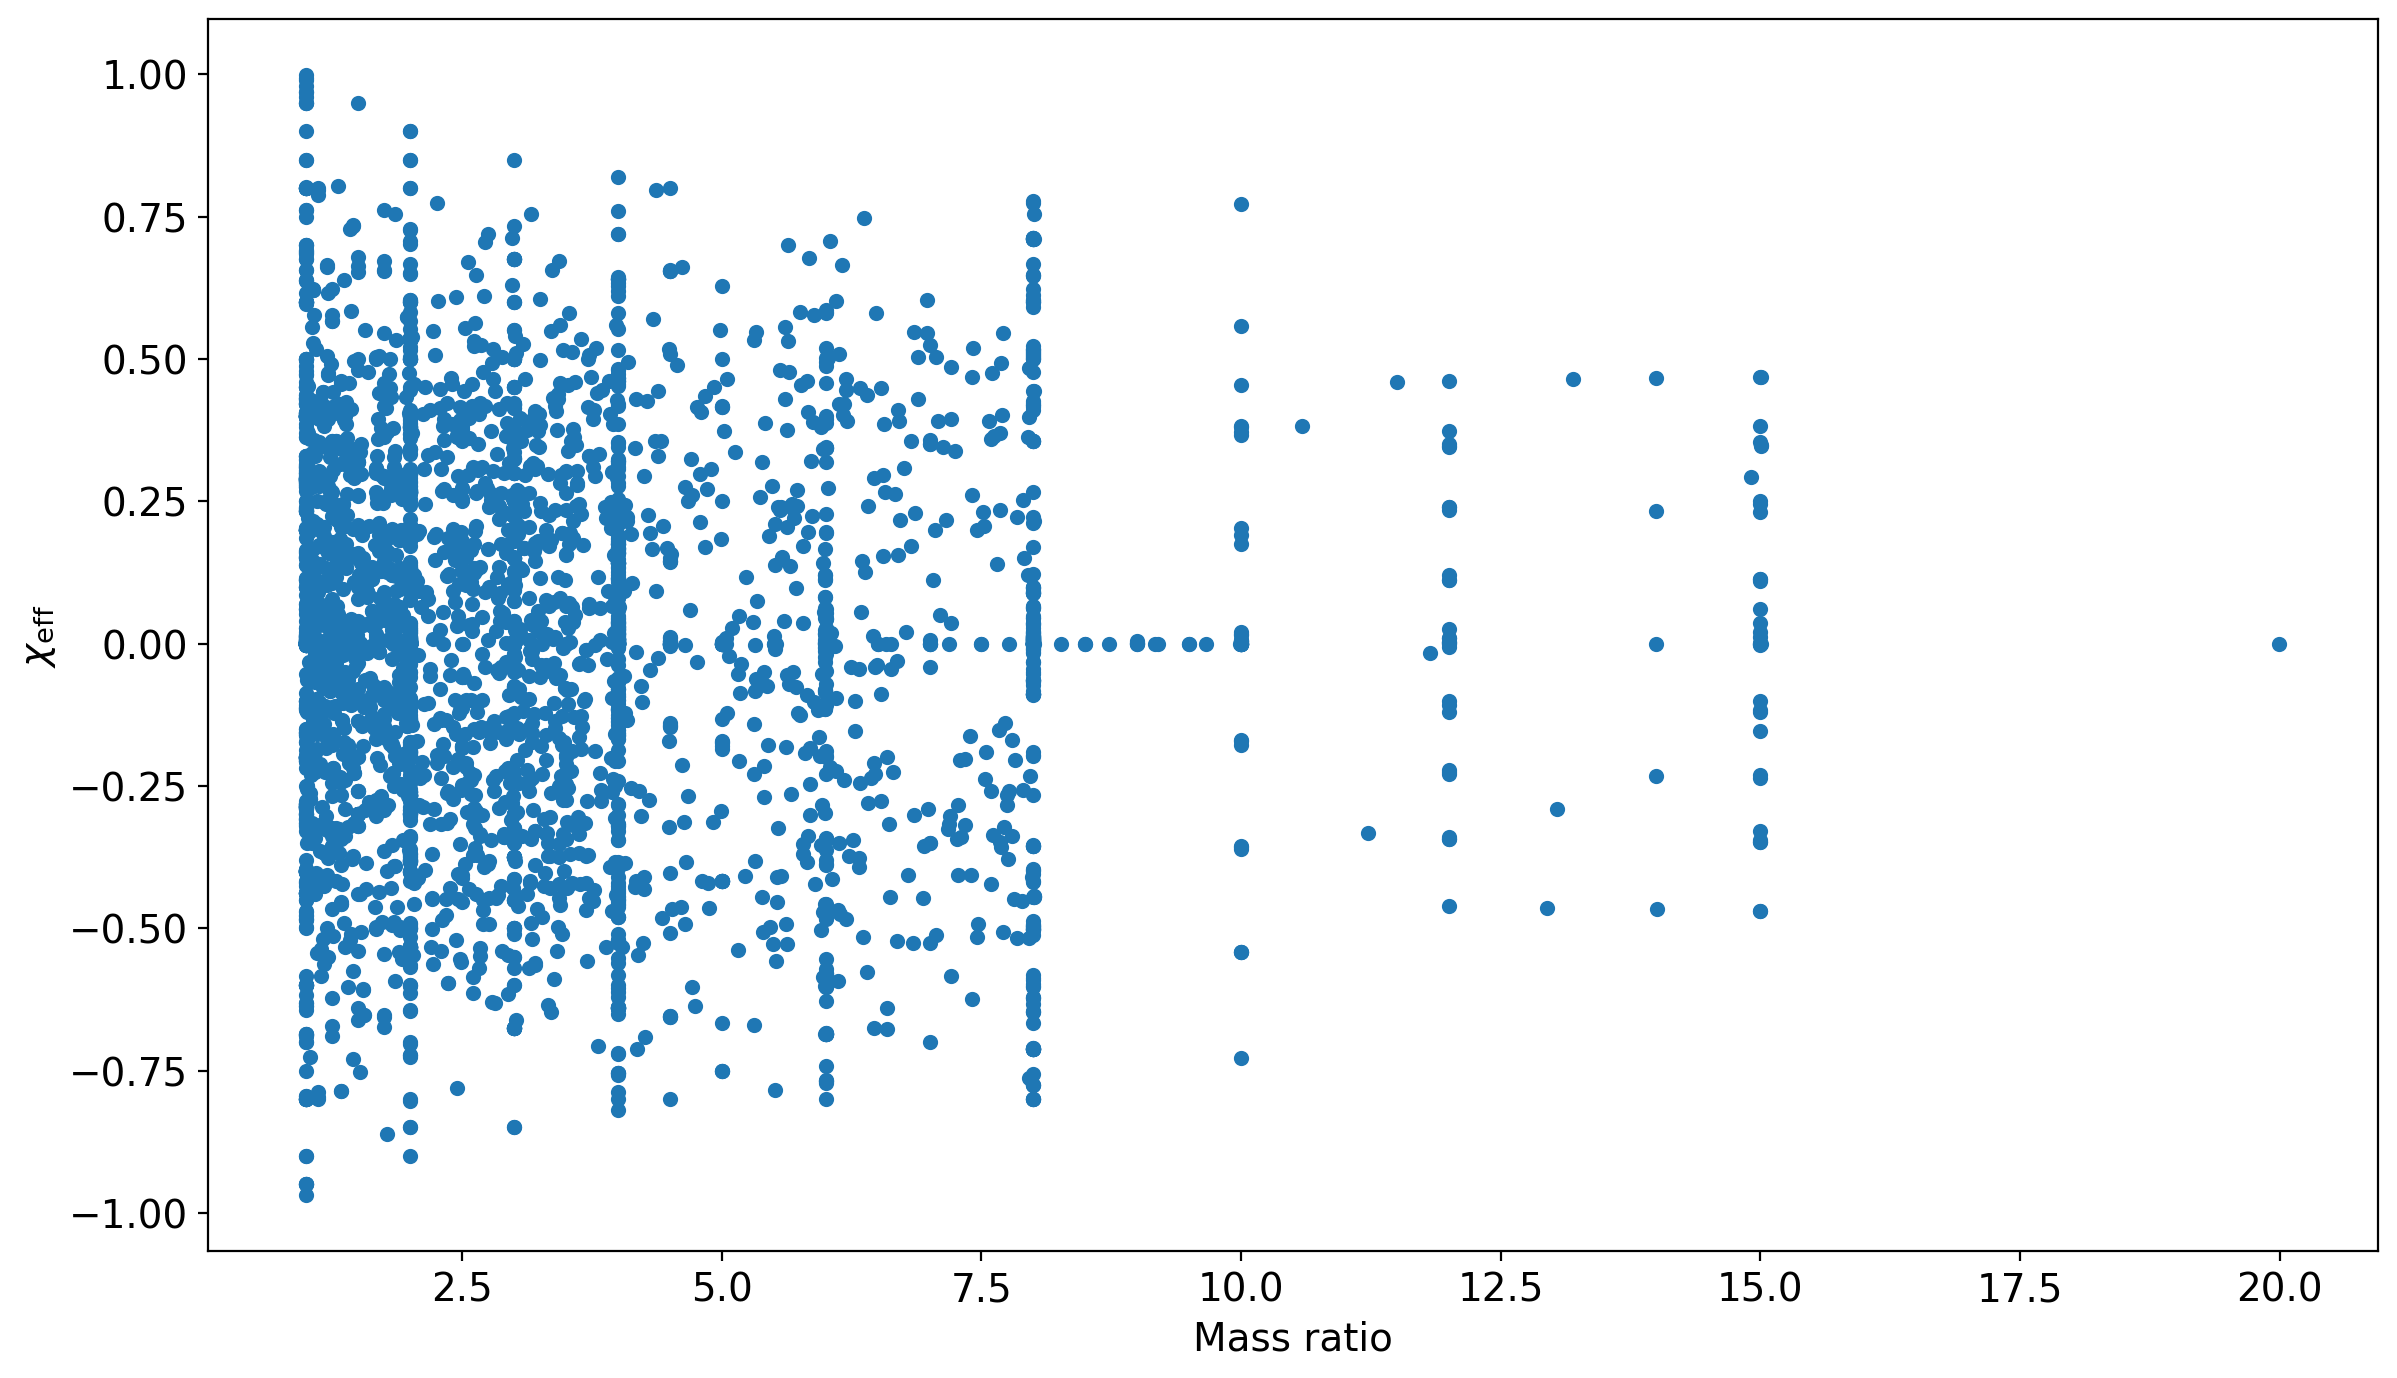

In [13]:
df.BBH.plot("reference_mass_ratio", "reference_chi_eff", kind="scatter")

# pandas adds the column labels as axis labels, but we can make them look nicer
import matplotlib.pyplot as plt
plt.xlabel(r"Mass ratio")
plt.ylabel(r"$\chi_\mathrm{eff}$");

Or we can make histograms of the data:

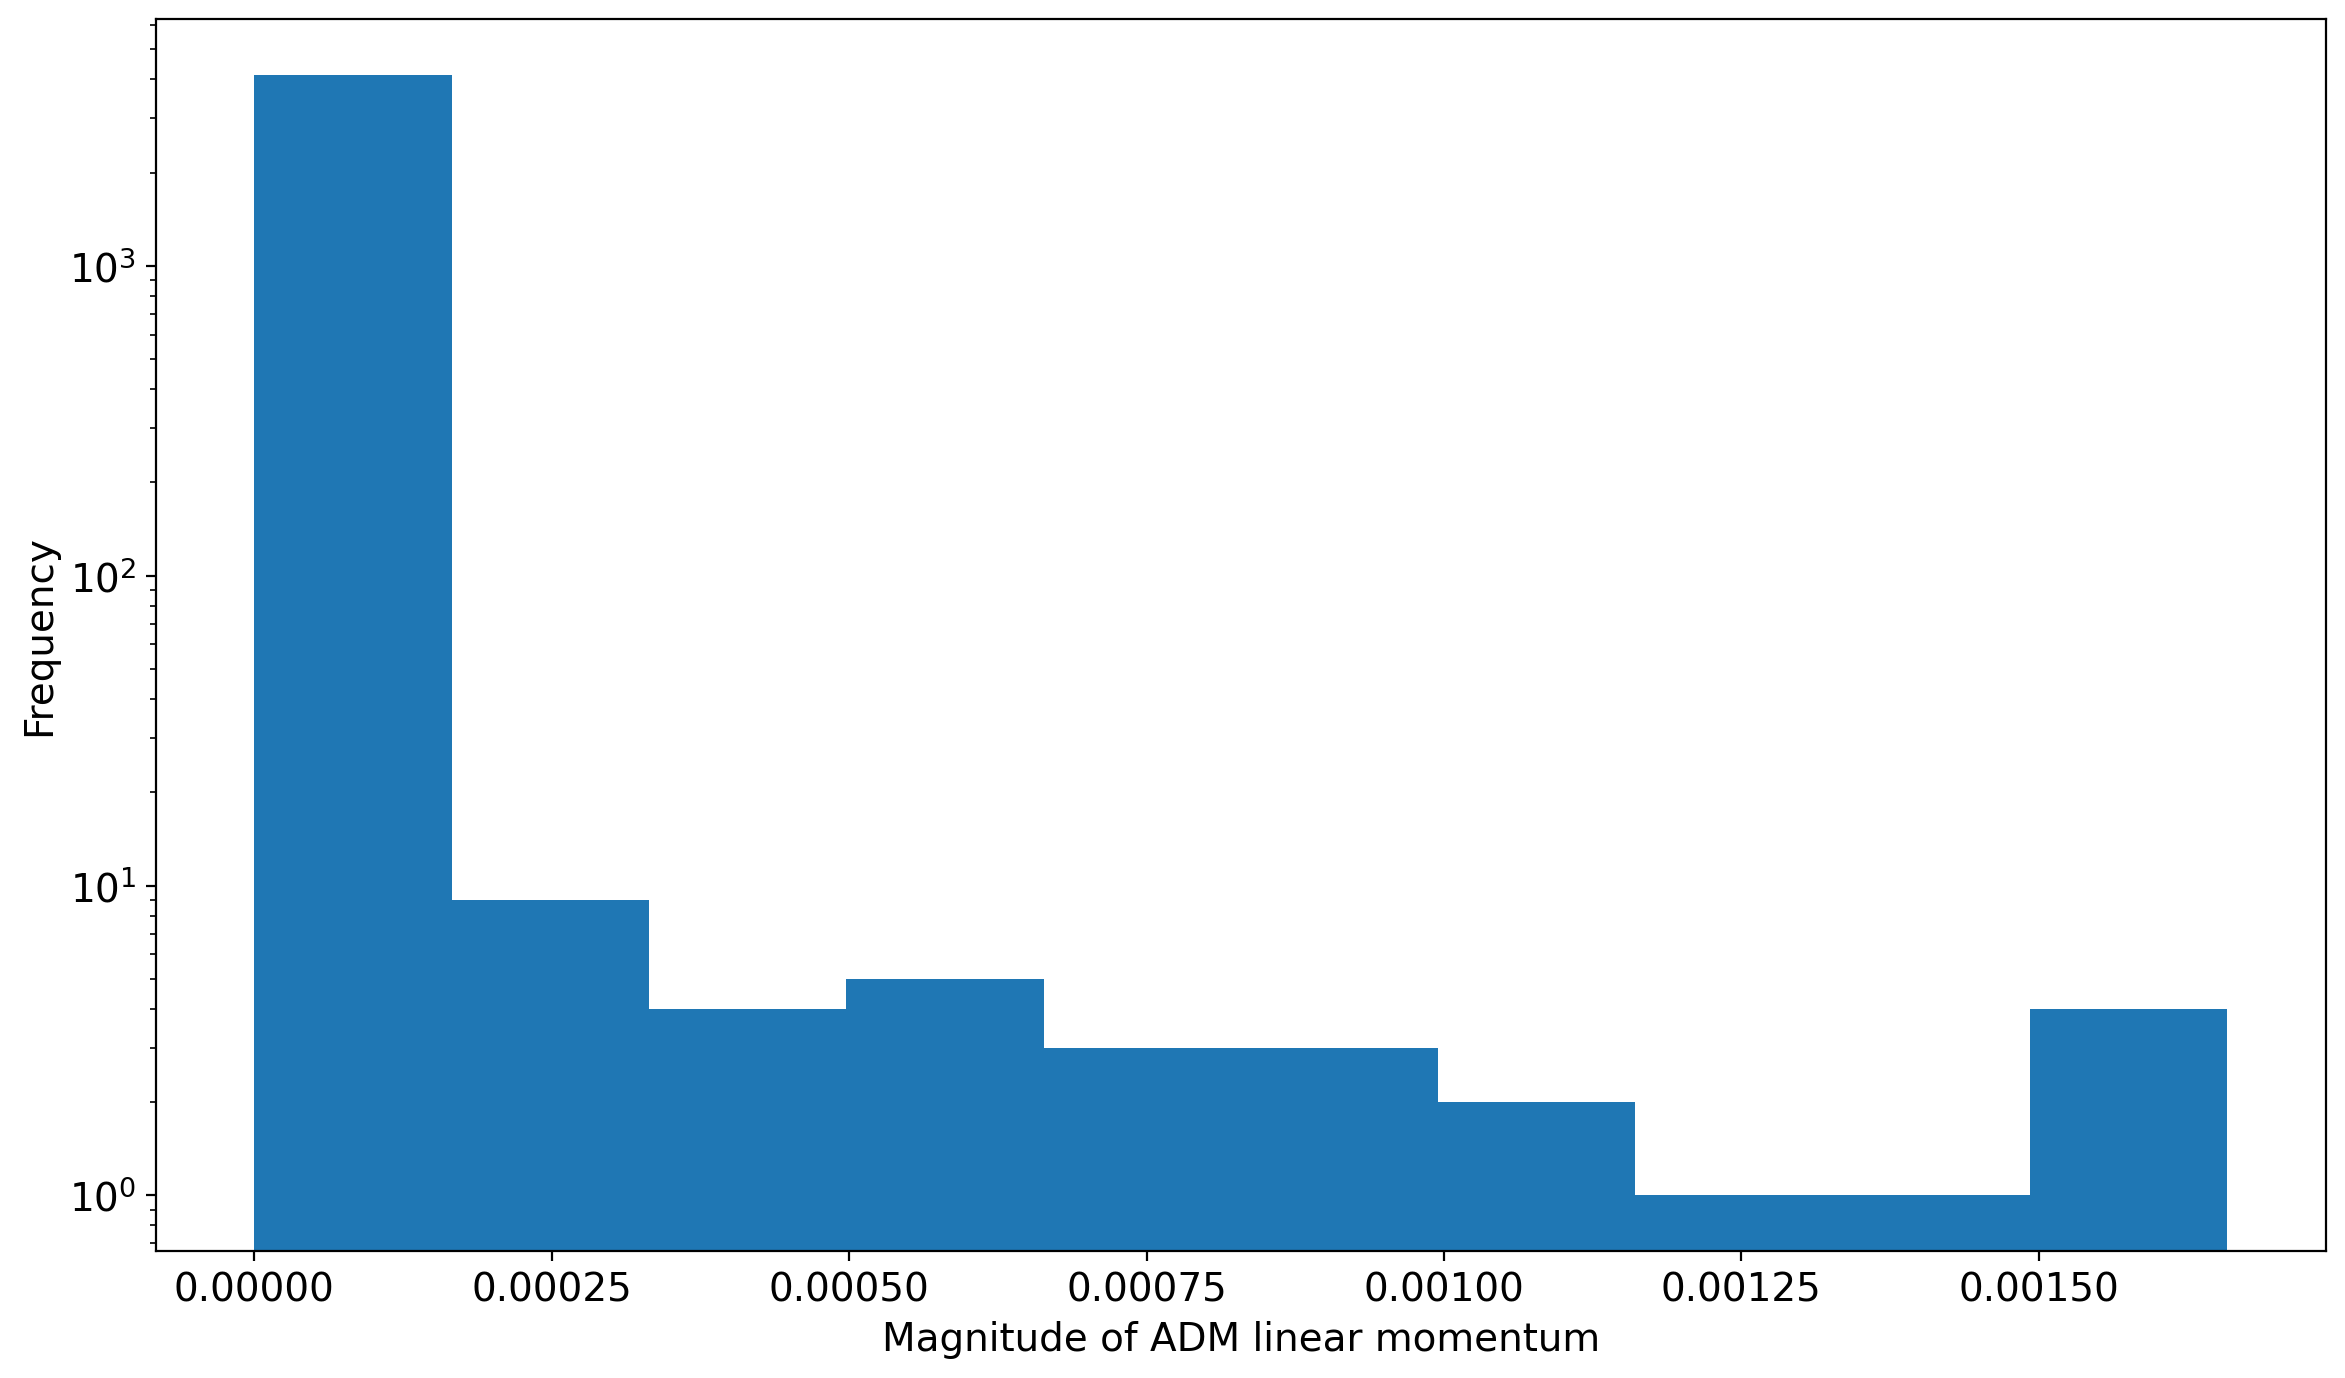

In [14]:
df.BBH["initial_ADM_linear_momentum_mag"].plot.hist(log=True)
plt.xlabel(r"Magnitude of ADM linear momentum");

We can even make corner plots:

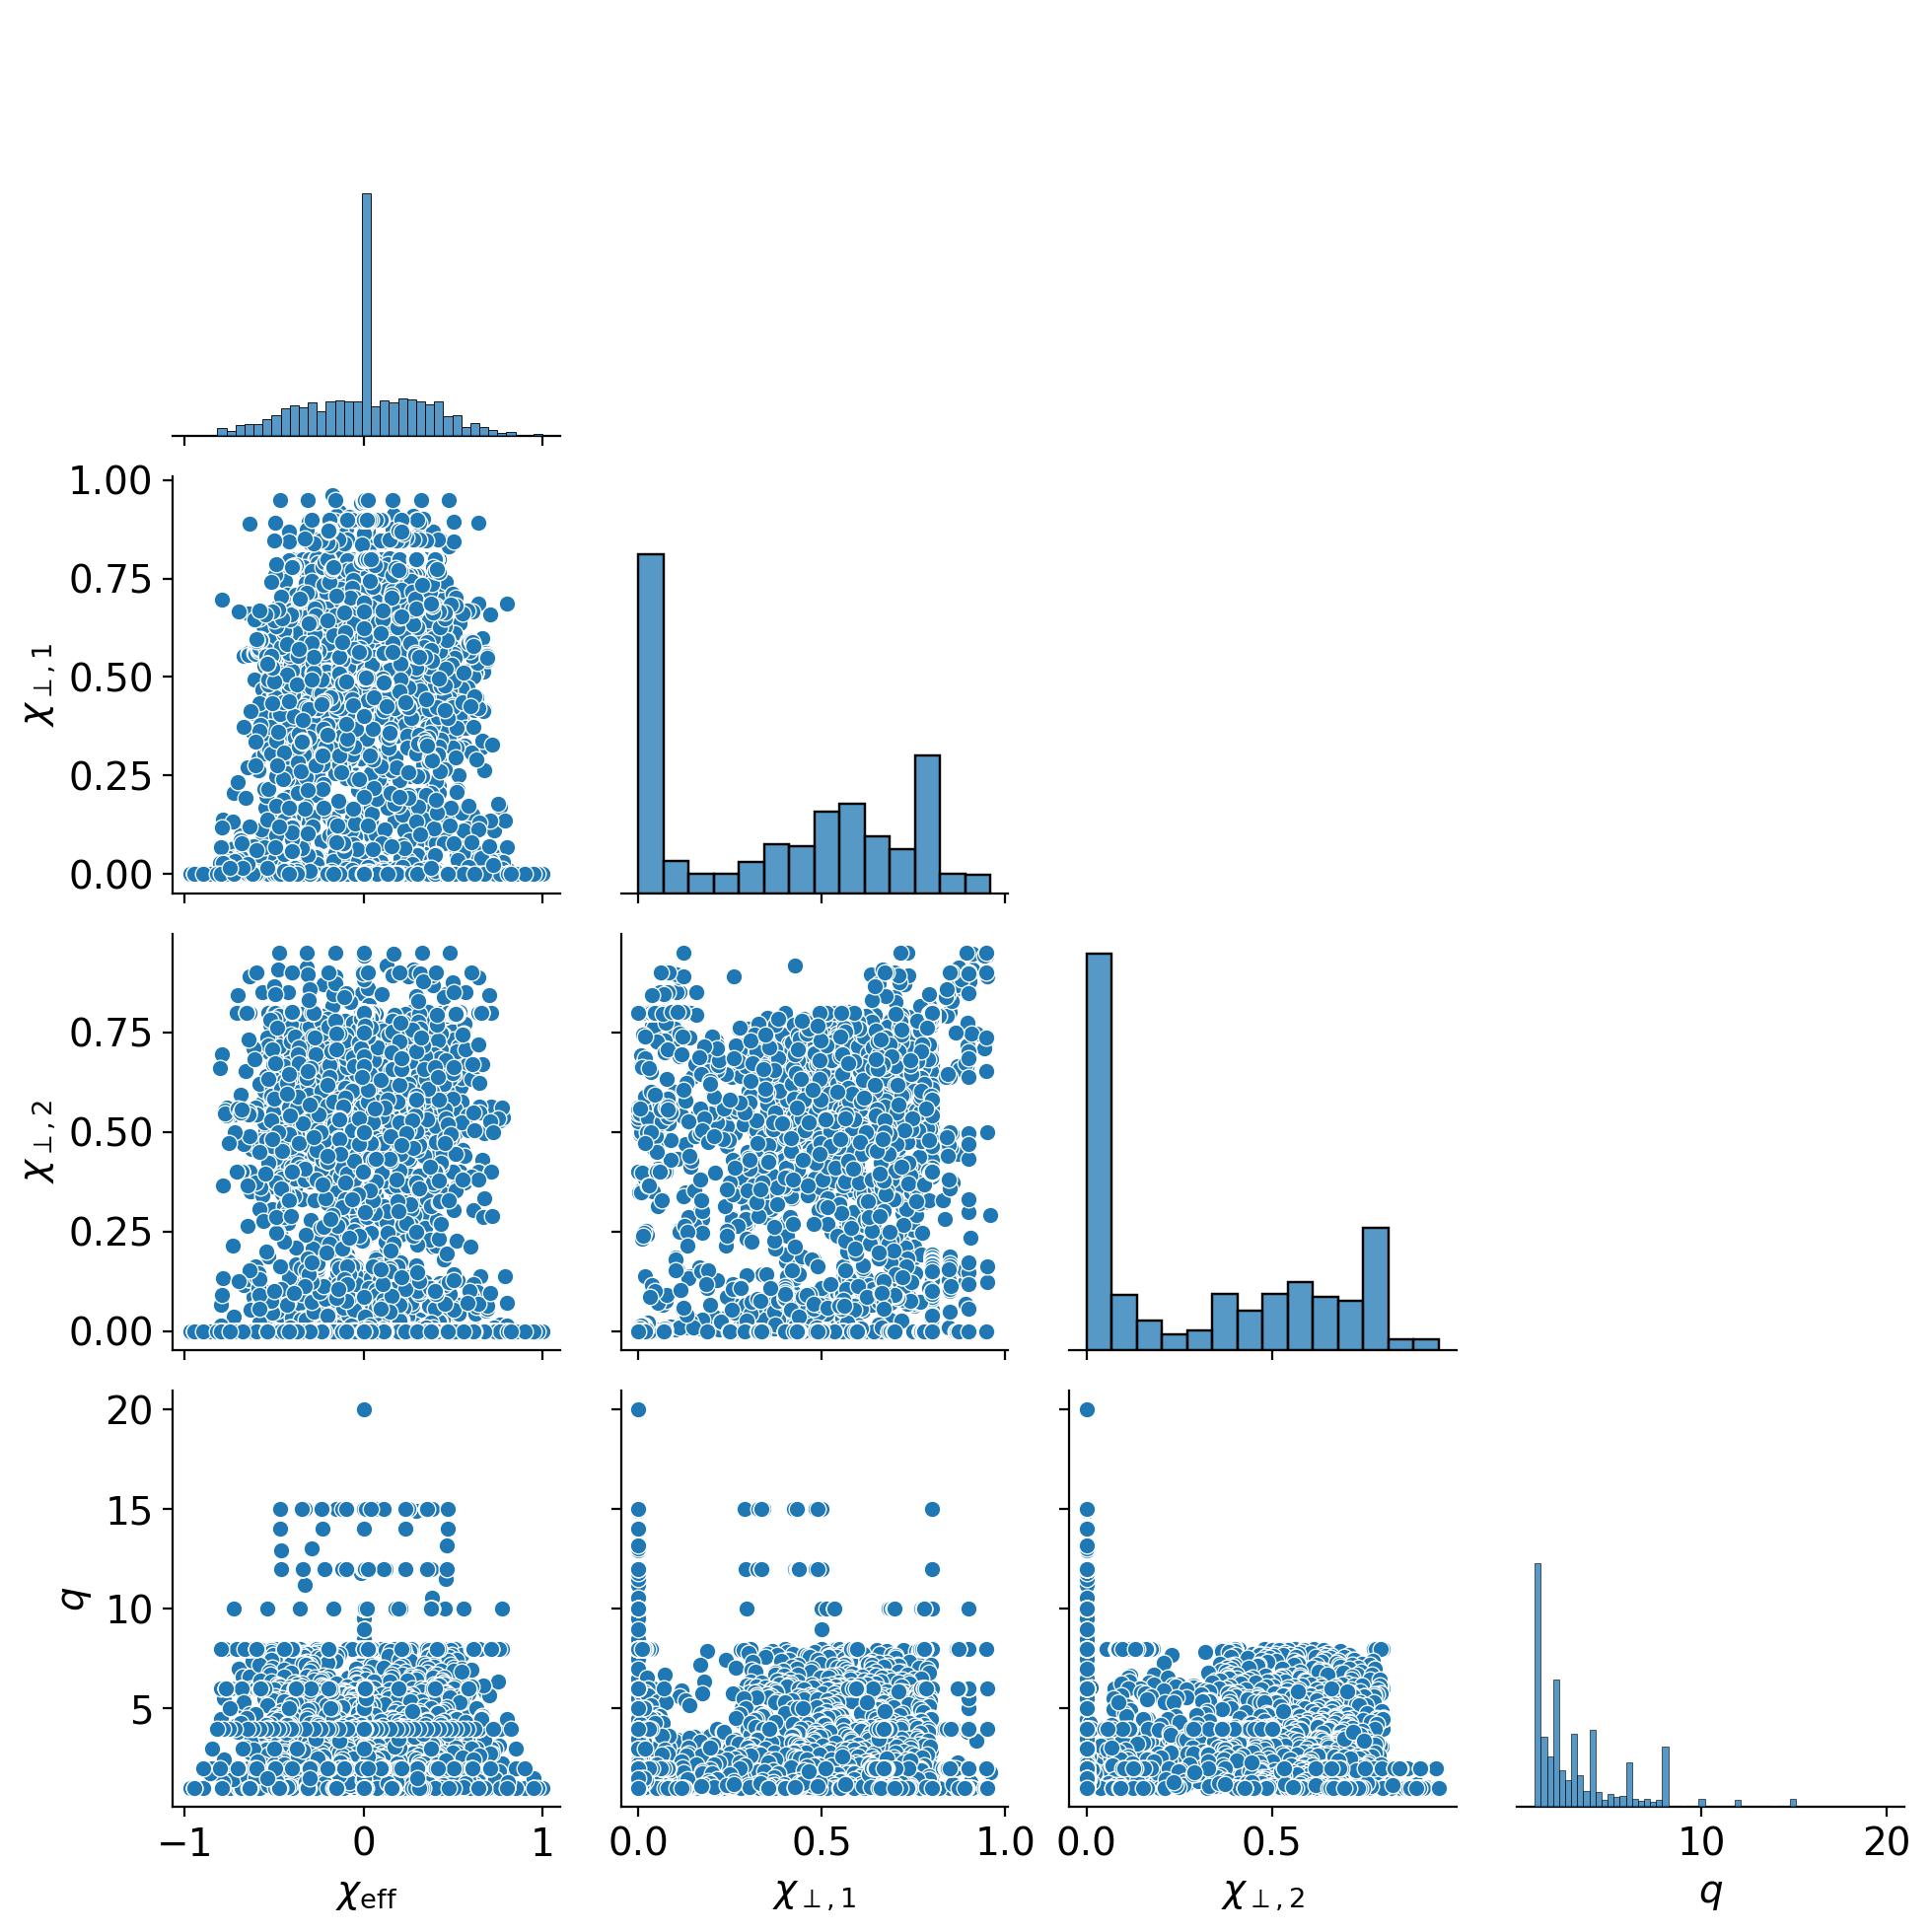

In [15]:
import seaborn as sns

pp = sns.pairplot(
    df.BBH[["reference_chi_eff", "reference_chi1_perp", "reference_chi2_perp", "reference_mass_ratio"]].dropna(),
    corner=True,
)
pp.y_vars = [r"$\chi_{\mathrm{eff}}$", r"$\chi_{\perp,1}$", r"$\chi_{\perp,2}$", r"$q$"]
pp.x_vars = pp.y_vars
pp._add_axis_labels()

The `simulations` object, especially when agumented with the `dataframe`, provides powerful methods for selecting the particular simulations we are interested in.  Once we have done so, we need to load and interact with the simulations.

Continue with the [introduction to the `Simulation` objects](/tutorials/02-Simulation).